In [1]:
import pandas as pd
print(pd.__version__)


3.0.0


In [2]:
#import required libraries
import pandas as pd
import sqlite3


In [5]:
#load orders.csv
orders = pd.read_csv("orders.csv")
print("Orders loaded")
orders.head()


Orders loaded


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [6]:
# load users.csv 
users = pd.read_json("users.json")
print("Users loaded")
users.head()


Users loaded


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [7]:
# Create database connection
conn = sqlite3.connect("restaurants.db")

# Load SQL file
with open("restaurants.sql", "r") as file:
    sql_script = file.read()

# Execute SQL
conn.executescript(sql_script)

print("Restaurants SQL loaded")


Restaurants SQL loaded


In [8]:
# read restaurants.sal
restaurants = pd.read_sql(
    "SELECT * FROM restaurants",
    conn
)

restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [9]:
# Merge Orders + Users (LEFT JOIN)
orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)

orders_users.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


In [10]:
# Merge with Restaurants (LEFT JOIN)
final_df = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)

final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [12]:
# Check Final Dataset
final_df.info()
final_df.shape
final_df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  str    
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  str    
 6   name               10000 non-null  str    
 7   city               10000 non-null  str    
 8   membership         10000 non-null  str    
 9   restaurant_name_y  10000 non-null  str    
 10  cuisine            10000 non-null  str    
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), str(7)
memory usage: 937.6 KB


order_id             0
user_id              0
restaurant_id        0
order_date           0
total_amount         0
restaurant_name_x    0
name                 0
city                 0
membership           0
restaurant_name_y    0
cuisine              0
rating               0
dtype: int64

In [13]:
# Checking data types
final_df.dtypes

order_id               int64
user_id                int64
restaurant_id          int64
order_date               str
total_amount         float64
restaurant_name_x        str
name                     str
city                     str
membership               str
restaurant_name_y        str
cuisine                  str
rating               float64
dtype: object

In [60]:
final_df = df.copy()


In [61]:

# Exporting final dataset to CSV
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

In [3]:
# Analysis of final dataset
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("final_food_delivery_dataset.csv")

In [62]:
import os
os.getcwd()


'C:\\Users\\shaha'

In [63]:
final_df = df
print("final_df recreated")


final_df recreated


In [65]:
final_df.to_csv(
    r"C:\Users\shaha\Downloads\final_food_delivery_dataset.csv",
    index=False
)

print("✅ File saved to Downloads")


✅ File saved to Downloads


In [66]:
import os
os.path.exists(r"C:\Users\shaha\Downloads\final_food_delivery_dataset.csv")


True

In [64]:
# Converting order_date to datetime format (DD-MM-YYYY)
df["order_date"] = pd.to_datetime(
    df["order_date"],
    format="%d-%m-%Y"
)
     

In [5]:

# Monthly order trend
monthly_orders = df.groupby(df["order_date"].dt.to_period("M"))["order_id"].count()
monthly_orders
     

order_date
2023-01    804
2023-02    785
2023-03    903
2023-04    812
2023-05    844
2023-06    784
2023-07    859
2023-08    851
2023-09    812
2023-10    863
2023-11    807
2023-12    849
2024-01     27
Freq: M, Name: order_id, dtype: int64

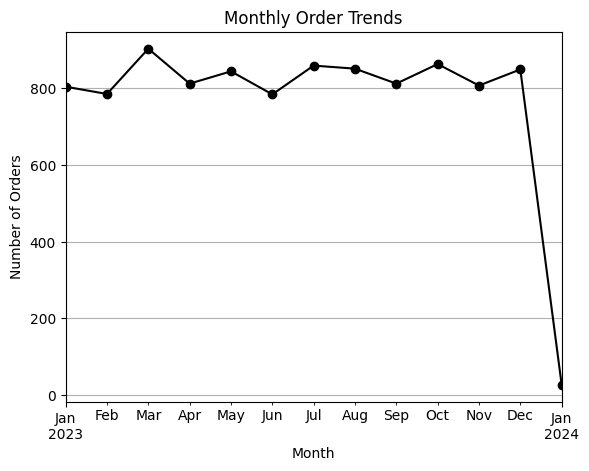

In [7]:
monthly_orders.plot(kind="line", marker="o", color ="Black")
plt.title("Monthly Order Trends")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()
     

In [8]:

# User Behavior Patterns
user_behavior = df.groupby("user_id").agg(
    total_orders=("order_id", "count"),
    total_spent=("total_amount", "sum")
)

user_behavior.head()

,total_orders,total_spent
user_id,,
1,1,1289.66
2,10,7564.12
3,2,1839.51
4,4,3741.16
5,5,5742.88


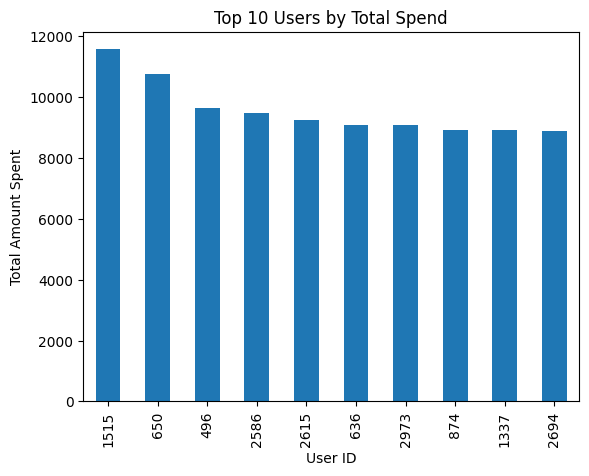

In [10]:
top_users = user_behavior.sort_values("total_spent", ascending=False).head(10)

top_users["total_spent"].plot(kind="bar")
plt.title("Top 10 Users by Total Spend")
plt.xlabel("User ID")
plt.ylabel("Total Amount Spent")
plt.show()

In [11]:

# City-Wise Performance

city_perf = df.groupby("city").agg(
    total_orders=("order_id", "count"),
    total_revenue=("total_amount", "sum")
)

city_perf

,total_orders,total_revenue
city,,
Bangalore,2751,2206946.58
Chennai,2469,1990513.03
Hyderabad,2350,1889366.58
Pune,2430,1924797.93


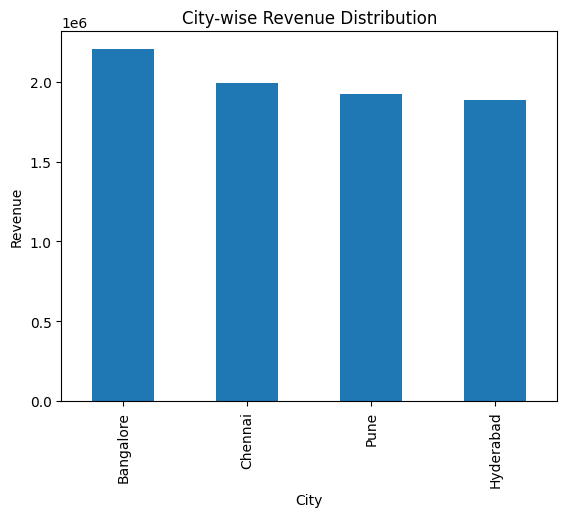

In [12]:


city_perf["total_revenue"].sort_values(ascending=False).plot(kind="bar")
plt.title("City-wise Revenue Distribution")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()

In [13]:
# Cuisine-Wise Performance

cuisine_perf = df.groupby("cuisine").agg(
    total_orders=("order_id", "count"),
    total_revenue=("total_amount", "sum")
)

cuisine_perf

,total_orders,total_revenue
cuisine,,
Chinese,2418,1930504.65
Indian,2469,1971412.58
Italian,2532,2024203.80
Mexican,2581,2085503.09


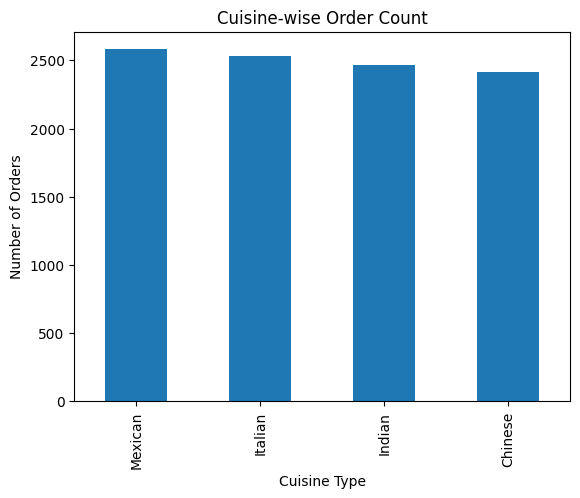

In [14]:


cuisine_perf["total_orders"].sort_values(ascending=False).plot(kind="bar")
plt.title("Cuisine-wise Order Count")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.show()

In [15]:

# Cuisine-Wise Performance

cuisine_perf = df.groupby("cuisine").agg(
    total_orders=("order_id", "count"),
    total_revenue=("total_amount", "sum")
)

cuisine_perf

,total_orders,total_revenue
cuisine,,
Chinese,2418,1930504.65
Indian,2469,1971412.58
Italian,2532,2024203.80
Mexican,2581,2085503.09


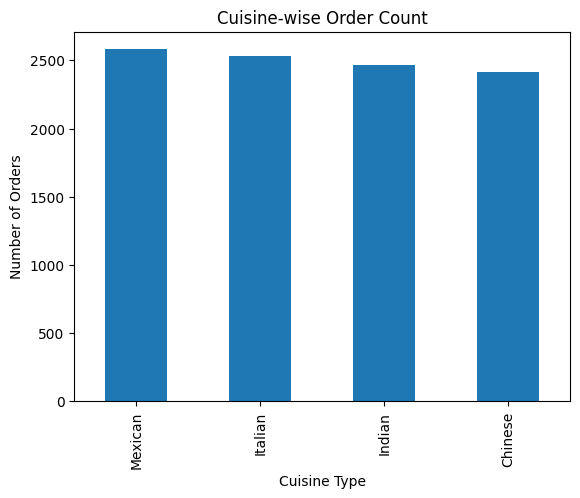

In [16]:

cuisine_perf["total_orders"].sort_values(ascending=False).plot(kind="bar")
plt.title("Cuisine-wise Order Count")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.show()
     

In [17]:
# Membership Impact (Gold vs Regular)

membership_analysis = df.groupby("membership").agg(
    total_orders=("order_id", "count"),
    total_revenue=("total_amount", "sum"),
    avg_order_value=("total_amount", "mean")
)

membership_analysis
     

,total_orders,total_revenue,avg_order_value
membership,,,
Gold,4987,3975364.89,797.145556
Regular,5013,4036259.23,805.158434


In [18]:
# Revenue Distribution & Seasonality

monthly_revenue = df.groupby(df["order_date"].dt.to_period("M"))["total_amount"].sum()
monthly_revenue

order_date
2023-01    645818.76
2023-02    630867.40
2023-03    716738.98
2023-04    666097.18
2023-05    668428.61
2023-06    610822.93
2023-07    688559.45
2023-08    694987.58
2023-09    653838.07
2023-10    699187.73
2023-11    637772.43
2023-12    681303.50
2024-01     17201.50
Freq: M, Name: total_amount, dtype: float64

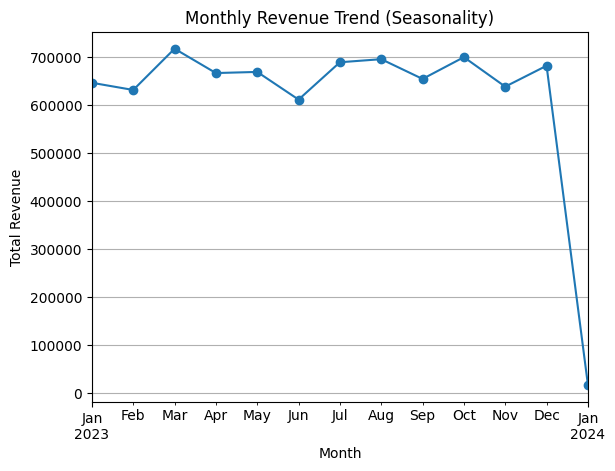

In [19]:
monthly_revenue.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()
     


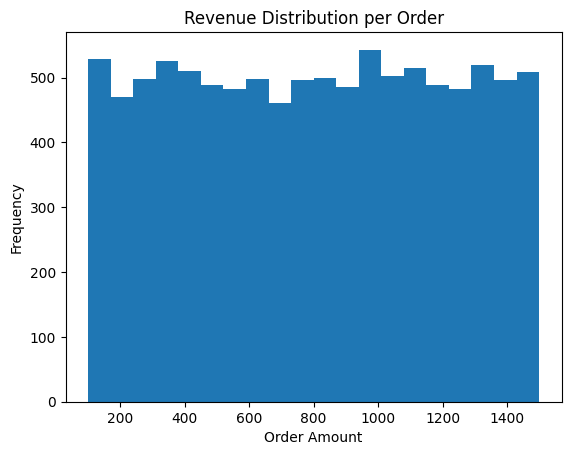

In [20]:

# Revenue Distribution

df["total_amount"].plot(kind="hist", bins=20)
plt.title("Revenue Distribution per Order")
plt.xlabel("Order Amount")
plt.show()
     


In [21]:
# Which city has the highest total revenue from Gold members?
gold_city_revenue = (
    df[df["membership"] == "Gold"]
    .groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

gold_city_revenue

city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [22]:
# Which cuisine has the highest average order value?

cuisine_avg_order = (
    df.groupby("cuisine")["total_amount"]
    .mean()
    .sort_values(ascending=False)
)

cuisine_avg_order
     

cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

In [23]:
# How many distinct users spent more than ₹1000 in total?

user_total_spend = (
    df.groupby("user_id")["total_amount"]
    .sum()
)

high_spenders = user_total_spend[user_total_spend > 1000]

len(high_spenders)

2544

In [24]:
# Which restaurant rating range generated the highest revenue?

df["rating_range"] = pd.cut(
    df["rating"],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0],
    labels=["3.0–3.5", "3.6–4.0", "4.1–4.5", "4.6–5.0"]
)

rating_revenue = (
    df.groupby("rating_range", observed=True)["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

rating_revenue

rating_range
4.6–5.0    2197030.75
4.1–4.5    1960326.26
3.0–3.5    1881754.57
3.6–4.0    1717494.41
Name: total_amount, dtype: float64

In [25]:

# Among Gold members, which city has the highest average order value?

gold_city_avg = (
    df[df["membership"] == "Gold"]
    .groupby("city")["total_amount"]
    .mean()
    .sort_values(ascending=False)
)

gold_city_avg

city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [26]:
# Which cuisine has the lowest number of distinct restaurants but still significant revenue?

cuisine_analysis = df.groupby("cuisine").agg(
    restaurant_count=("restaurant_id", "nunique"),
    total_revenue=("total_amount", "sum")
).sort_values("restaurant_count")

cuisine_analysis
     

,restaurant_count,total_revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [27]:


# What % of total orders were placed by Gold members?

total_orders = len(df)
gold_orders = len(df[df["membership"] == "Gold"])

percentage = round((gold_orders / total_orders) * 100)
percentage
     

50

In [44]:
# Which restaurant has the highest average order value but less than 20 total orders?

restaurant_stats = df.groupby("restaurant_name").agg(
    total_orders=("order_id", "count"),
    avg_order_value=("total_amount", "mean")
)

filtered = restaurant_stats[restaurant_stats["total_orders"] < 20]

filtered.sort_values("avg_order_value", ascending=False).head()


,total_orders,avg_order_value
restaurant_name,,
Restaurant_294,13,1040.222308
Restaurant_262,18,1029.473333
Restaurant_77,12,1029.180833
Restaurant_193,15,1026.306667
Restaurant_7,16,1002.140625


In [43]:
df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'order_restaurant_name', 'name', 'city', 'membership_type',
       'restaurant_name', 'cuisine', 'rating'],
      dtype='str')

In [46]:

# Which combination contributes the highest revenue?

combo_revenue = (
    df.groupby(["membership_type", "cuisine"])["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

combo_revenue
     

membership_type  cuisine
Regular          Mexican    1072943.30
                 Italian    1018424.75
Gold             Mexican    1012559.79
                 Italian    1005779.05
Regular          Indian      992100.27
Gold             Indian      979312.31
                 Chinese     977713.74
Regular          Chinese     952790.91
Name: total_amount, dtype: float64

In [55]:
# During which quarter is total revenue highest?

df["quarter"] = df["order_date"].dt.to_period("Q")

quarter_revenue = (
    df.groupby("quarter")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

quarter_revenue

quarter
2023Q3    2037385.10
2023Q4    2018263.66
2023Q1    1993425.14
2023Q2    1945348.72
2024Q1      17201.50
Freq: Q-DEC, Name: total_amount, dtype: float64

In [47]:
import pandas as pd

# Load final dataset
df = pd.read_csv("final_food_delivery_dataset.csv")

# Fix date format
df["order_date"] = pd.to_datetime(df["order_date"], format="%d-%m-%Y")

# (Optional but recommended) Rename columns for clarity
df = df.rename(columns={
    "restaurant_name_x": "order_restaurant_name",
    "restaurant_name_y": "restaurant_name",
    "membership": "membership_type"
})

In [48]:

gold_orders_count = df[df["membership_type"] == "Gold"].shape[0]
gold_orders_count
     

4987

In [49]:

hyderabad_revenue = df[df["city"] == "Hyderabad"]["total_amount"].sum()

round(hyderabad_revenue)
     

1889367

In [50]:

distinct_users = df["user_id"].nunique()
distinct_users

2883

In [51]:

gold_avg_order_value = df[df["membership_type"] == "Gold"]["total_amount"].mean()

round(gold_avg_order_value, 2)

np.float64(797.15)

In [52]:

high_rating_orders = df[df["rating"] >= 4.5].shape[0]
high_rating_orders
     

3374

In [53]:


gold_city_revenue = (
    df[df["membership_type"] == "Gold"]
    .groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

gold_city_revenue

city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [54]:

top_gold_city = gold_city_revenue.index[0]

orders_in_top_gold_city = df[
    (df["membership_type"] == "Gold") &
    (df["city"] == top_gold_city)
].shape[0]

orders_in_top_gold_city

     

1337